In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

#filename = '/home/data/BITS/BITS 3-1/Applied Stastical Methods/Assignment-2/Statistical-Analysis-and-Forecasting-of-Solar-Energy/Renewable Energy Data/Andhra Pradesh/34082_14.25_77.35_2000.csv'

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [4]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI,Date
0,2001,1,1,0,0,0,2001-01-01 00:00:00
1,2001,1,1,1,0,0,2001-01-01 01:00:00
2,2001,1,1,2,0,0,2001-01-01 02:00:00
3,2001,1,1,3,0,0,2001-01-01 03:00:00
4,2001,1,1,4,0,0,2001-01-01 04:00:00


In [5]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [6]:
df_all.set_index('Date',inplace=True)

In [7]:
df_all = df_all.between_time('09:00','15:00')

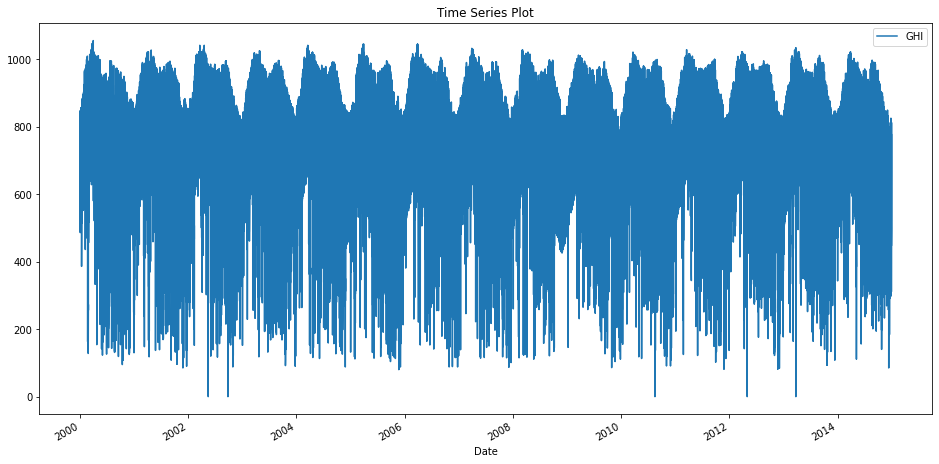

In [8]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [9]:
df_all.fillna(df_all.mean(),inplace=True)

In [10]:
df_all['GHI'].unique()

array([ 509,  557,  619,  342,  500,  607,  375,  501,  681,  766,  320,
        242,  610,  479,  286,  572,  737,  771,  448,  456,  347,  525,
        691,  795,  812,  783,  668,  447,  528,  696,  802,  835,  792,
        677,  526,  695,  801,  834,  791,  502,  532,  702,  809,  844,
        688,  512,  537,  710,  807,  855,  813,  698,  516,  530,  700,
        840,  798,  684,  778,  793,  587,  508,  519,  797,  832,  521,
        800,  836,  796,  520,  692,  518,  534,  709,  820,  858,  818,
        705,  529,  535,  823,  861,  821,  708,  706,  856,  531,  715,
        829,  868,  830,  717,  542,  713,  837,  875,  722,  545,  720,
        874,  723,  547,  721,  878,  727,  551,  543,  718,  828,  895,
        731,  468,  654,  735,  862,  808,  555,  300,  539,  872,  725,
        712,  870,  552,  716,  841,  732,  559,  711,  843,  884,  879,
        765,  577,  726,  833,  873,  415,  815,  806,  842,  597,  575,
        568,  773,  729,  647,  390,  524,  562,  5

In [11]:
y=df_all['GHI'].resample('W-MON').mean()

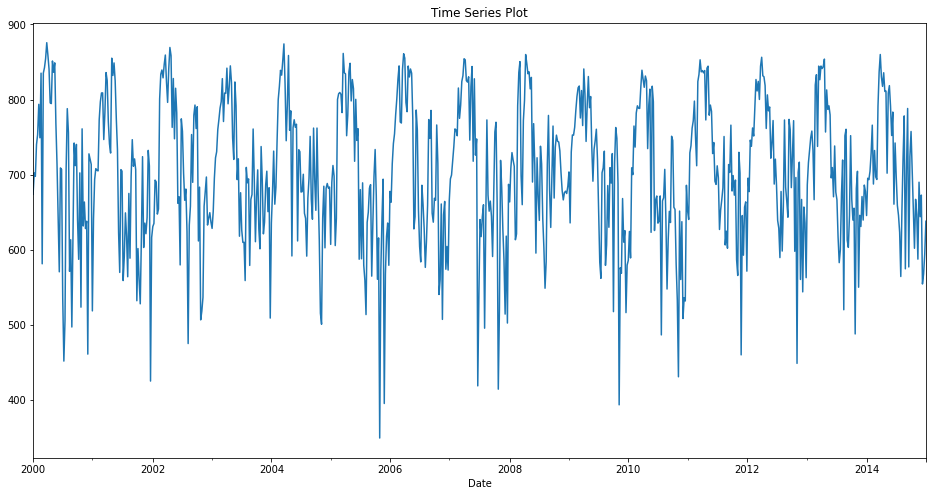

In [12]:
y.plot(figsize=[16,8],title='Time Series Plot')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
result=seasonal_decompose(y,model='multiplicative')

In [15]:
import pylab

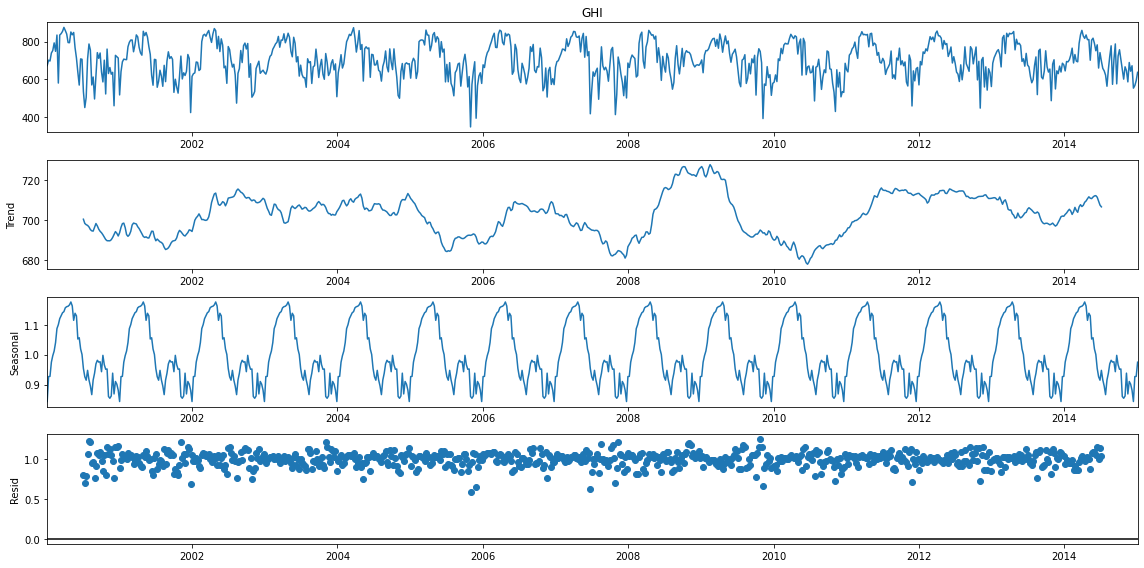

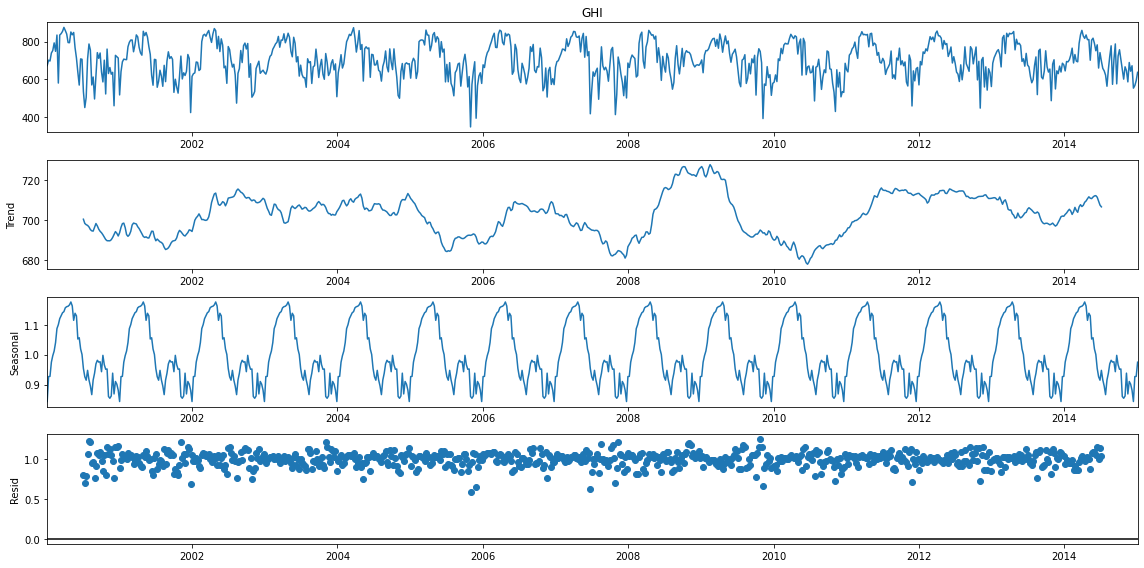

In [16]:
pylab.rcParams['figure.figsize'] = (16, 8)
result.plot()

In [25]:
import statsmodels.tsa.api as smtsa

In [29]:
X = df_all.GHI
X.head()

Date
2001-01-01 09:00:00    509
2001-01-01 10:00:00    557
2001-01-01 11:00:00    619
2001-01-01 12:00:00    342
2001-01-01 13:00:00    500
Name: GHI, dtype: int64

In [30]:
from statsmodels.tsa.stattools import adfuller

In [32]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.502245
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [33]:
from statsmodels.graphics.tsaplots import plot_acf

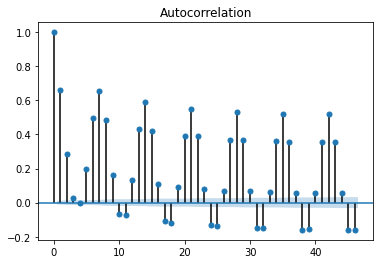

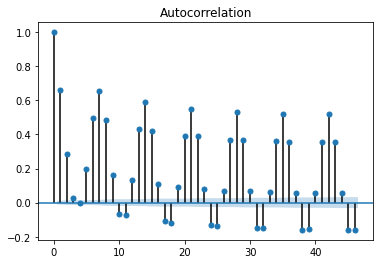

In [34]:
plot_acf(X)

In [35]:
X_diff = X.diff(periods=1)

In [37]:
X_diff.head()

Date
2001-01-01 09:00:00      NaN
2001-01-01 10:00:00     48.0
2001-01-01 11:00:00     62.0
2001-01-01 12:00:00   -277.0
2001-01-01 13:00:00    158.0
Name: GHI, dtype: float64

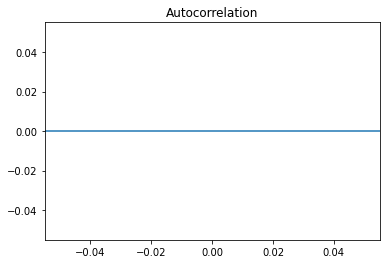

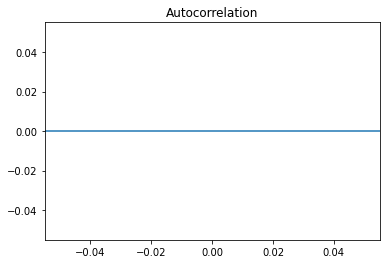

In [36]:
plot_acf(X_diff)

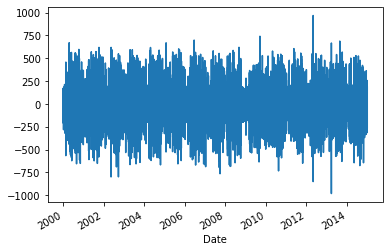

In [38]:
X_diff.plot()